In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import itertools

In [110]:
data_raw = pd.read_csv("f1_clean.csv")
data_raw.head()

,raceId,race,year,circuit,constructor,driver,qualifyingPos,position,points,teammate
0,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Ferrari,ALO,3,1,25.0,OTHER
1,337,Bahrain Grand Prix,2010,Bahrain International Circuit,McLaren,HAM,4,3,15.0,OTHER
2,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Red Bull,VET,1,4,12.0,OTHER
3,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Williams,HUL,13,14,0.0,OTHER
4,338,Australian Grand Prix,2010,Albert Park Grand Prix Circuit,Ferrari,ALO,3,4,12.0,OTHER


In [111]:
data_train = data_raw[["year", "circuit", "constructor", "driver", "qualifyingPos", "teammate", "position", "points"]]
data_train

,year,circuit,constructor,driver,qualifyingPos,teammate,position,points
0,2010,Bahrain International Circuit,Ferrari,ALO,3,OTHER,1,25.0
1,2010,Bahrain International Circuit,McLaren,HAM,4,OTHER,3,15.0
2,2010,Bahrain International Circuit,Red Bull,VET,1,OTHER,4,12.0
3,2010,Bahrain International Circuit,Williams,HUL,13,OTHER,14,0.0
4,2010,Albert Park Grand Prix Circuit,Ferrari,ALO,3,OTHER,4,12.0
...,...,...,...,...,...,...,...,...
2733,2023,Autódromo Hermanos Rodríguez,Alfa Romeo,BOT,9,ZHO,15,0.0
2734,2023,Autódromo Hermanos Rodríguez,Aston Martin,STR,0,ALO,17,0.0
2735,2023,Autódromo Hermanos Rodríguez,Aston Martin,ALO,13,STR,0,0.0
2736,2023,Autódromo Hermanos Rodríguez,Haas F1 Team,MAG,16,HUL,0,0.0


In [112]:
def standard_scaler_scale(data):
    return (data - data.mean()) / data.std()

def standard_scaler_unscale(data, mean, std):
    return data * std + mean

(array([ 1., 22., 27., 17., 19., 19., 20., 18., 20., 17., 14., 18., 14.,
         9., 14.,  8., 10.,  5.,  2.,  2.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 20 artists>)

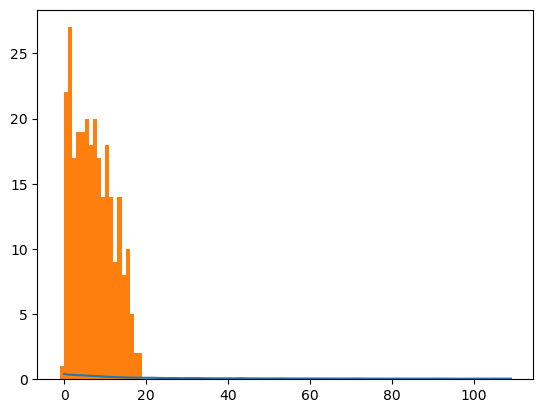

In [113]:
one_hot_encoded_data = pd.get_dummies(data_train, columns = ['circuit', 'constructor', 'driver', 'teammate'])
data_train_scaled = one_hot_encoded_data.copy()
data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
data_train_scaled.position = standard_scaler_scale(one_hot_encoded_data.position)

train_set = data_train_scaled[data_train_scaled.year != 2023]
test_set = data_train_scaled[data_train_scaled.year == 2023]

X_train = train_set.drop(['position', 'year', 'points'],axis = 1)
y_train = train_set['position']

regr = MLPRegressor(
    hidden_layer_sizes=(500, 250, 100, 50), 
    max_iter=500,
    random_state=203043043
    ).fit(X_train, y_train)

plt.plot(regr.loss_curve_)

X_test = test_set.drop(['position', 'year', 'points'],axis = 1)
y_test = test_set.position

pred = regr.predict(X_test)
# resid = abs(y_test - pred)

pred_unscaled = standard_scaler_unscale(pred, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
y_test_unscaled = standard_scaler_unscale(y_test, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
plt.hist(pred_unscaled, bins = 20)
# plt.hist(y_test_unscaled, bins = 20)
# plt.hist((pred_unscaled - y_test_unscaled), bins = 30)

In [114]:
np.mean(abs(y_test_unscaled - pred_unscaled))

3.7681159420289854

In [115]:
sum((y_test_unscaled - pred_unscaled)**2) / len(y_test_unscaled)

25.956521739130434

## test the original model w/ permuted data

In [116]:
import itertools
 

circuits = data_train.circuit.unique()
drivers = data_train.driver.unique()
teammates = data_train.teammate.unique()
constructors = data_train.constructor.unique()
# qualifying_positions = data_train.qualifyingPos.unique()
qualifying_positions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
all_list = [circuits, drivers, partners, qualifying_positions, constructors]
 
res = list(itertools.product(*all_list))



In [117]:
current_circuits = data_train.loc[data_train['year'] == 2023]['circuit'].unique()
current_drivers = data_train.loc[data_train['year'] == 2023]['driver'].unique()

current_teammates = data_train.loc[data_train['year'] == 2023]['teammate'].unique()
current_constructors = data_train.loc[data_train['year'] == 2023]['constructor'].unique()



In [118]:
all_permutations = pd.DataFrame(res, columns=['circuit', 'driver', 'teammate', 'qualifyingPos', 'constructor'])
cleaned_permutations = all_permutations.loc[all_permutations['driver'] != all_permutations['teammate']]
cleaned_permutations

,circuit,driver,teammate,qualifyingPos,constructor
0,Bahrain International Circuit,ALO,OTHER,1,Ferrari
1,Bahrain International Circuit,ALO,OTHER,1,McLaren
2,Bahrain International Circuit,ALO,OTHER,1,Red Bull
3,Bahrain International Circuit,ALO,OTHER,1,Williams
4,Bahrain International Circuit,ALO,OTHER,1,Alfa Romeo
...,...,...,...,...,...
1755395,Jeddah Corniche Circuit,ZHO,TSU,20,Alpine F1 Team
1755396,Jeddah Corniche Circuit,ZHO,TSU,20,AlphaTauri
1755397,Jeddah Corniche Circuit,ZHO,TSU,20,Aston Martin
1755398,Jeddah Corniche Circuit,ZHO,TSU,20,Mercedes


In [119]:
dnf_circuit = pd.read_csv('f1_dnf_circuit.csv')
dnf_circuit

,circuit,percentDnf
0,Albert Park Grand Prix Circuit,0.250000
1,Autodromo Enzo e Dino Ferrari,0.176471
2,Autodromo Nazionale di Monza,0.135294
3,Autódromo Hermanos Rodríguez,0.138211
4,Autódromo José Carlos Pace,0.136691
5,Bahrain International Circuit,0.131148
6,Baku City Circuit,0.209091
7,Circuit Gilles Villeneuve,0.107914
8,Circuit de Barcelona-Catalunya,0.115607
9,Circuit de Monaco,0.154839


In [120]:
for circuit in circuits:
    if circuit not in current_circuits:
        print(circuit)

Autódromo José Carlos Pace
Yas Marina Circuit
Autodromo Enzo e Dino Ferrari


In [121]:
not_teammates_and_drivers = []
for driver in drivers:
    if driver not in current_drivers:
        not_teammates_and_drivers.append('driver_'+ driver)
for teammate in teammates:
    if teammate not in current_teammates:
        not_teammates_and_drivers.append('teammate_'+teammate)


not_teammates_and_drivers

['driver_VET',
 'driver_RAI',
 'driver_GRO',
 'teammate_GRO',
 'teammate_RAI',
 'teammate_VET',
 'teammate_NOR',
 'teammate_ALB']

In [122]:
# iterate through entire dataset

all_preds = []
# do one hot encoding requires all possible combinations to be same as training set
one_hot_circuit = pd.get_dummies(cleaned_permutations, columns = ['circuit', 'constructor', 'driver', 'teammate'])

# remove drivers and teammates that don't exist on the circuit for 2023 also remove Imola because canceled 2023
one_hot_circuit = one_hot_circuit.loc[(one_hot_circuit['driver_VET'] != 1) & (one_hot_circuit['driver_RAI'] != 1) & (one_hot_circuit['driver_GRO'] != 1) & (one_hot_circuit['teammate_GRO'] != 1) & (one_hot_circuit['teammate_RAI'] != 1) & (one_hot_circuit['teammate_VET'] != 1) & (one_hot_circuit['circuit_Autodromo Enzo e Dino Ferrari'] != 1)]

# create a dataframe to store the results
final_results = pd.DataFrame(columns=['circuit', 'driver', 'pred_pos'])

for circuit in current_circuits: 

    # get the data specific to the circuit
    circuit_data = one_hot_circuit.loc[one_hot_circuit['circuit_'+circuit] == 1]


    # need to randomly make a couple qualifying positions dnq
    dnf_rate = dnf_circuit.loc[dnf_circuit['circuit'] == circuit]['percentDnf'].iloc[0]

    num_values_to_replace = int(dnf_rate * len(circuit_data['qualifyingPos']))
    indices_to_replace = np.random.choice(circuit_data.index, num_values_to_replace, replace=False)
    circuit_data.loc[indices_to_replace, 'qualifyingPos'] = 0

    # predict on the circuit
    pred_vals = standard_scaler_unscale(regr.predict(circuit_data), one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    circuit_data['all_preds'] = pred_vals     

    for driver in drivers:

        # find the median position for each driver
        med_pos = circuit_data.loc[circuit_data['driver_'+driver] == 1]['all_preds'].median()
        # add the results to the dataframe
        final_results = final_results.append({'circuit': circuit, 'driver': driver, 'pred_pos': med_pos}, ignore_index=True)  

final_results['pred_points'] = final_results['pred_pos']   
final_results['pred_points'] = final_results['pred_points'].replace({1.0: 25, 2.0: 18, 3.0: 15, 4.0: 12, 5.0: 10, 6.0: 8, 7.0: 6, 8.0: 4, 9.0: 2, 10.0: 1})   


In [124]:
final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False)

,pred_pos,pred_points
driver,,
HAM,39.0,293.0
ALO,40.0,289.0
LEC,43.0,273.0
TSU,44.0,252.0
VER,56.0,232.0
RUS,58.0,229.0
STR,58.0,229.0
HUL,36.0,226.0
MAG,64.0,211.0


## create model by track and test w/ permuted data 

In [233]:
data_raw = pd.read_csv("f1_clean.csv")

data_train = data_raw[["year", "circuit", "constructor", "driver", "qualifyingPos", "teammate", "position", "points"]]



In [234]:
circuits = data_train.circuit.unique()
drivers = data_train.driver.unique()
teammates = data_train.teammate.unique()
constructors = data_train.constructor.unique()
# qualifying_positions = data_train.qualifyingPos.unique()
qualifying_positions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
all_list = [circuits, drivers, partners, qualifying_positions, constructors]
 
res = list(itertools.product(*all_list))

all_permutations = pd.DataFrame(res, columns=['circuit', 'driver', 'teammate', 'qualifyingPos', 'constructor'])
cleaned_permutations = all_permutations.loc[all_permutations['driver'] != all_permutations['teammate']]
cleaned_permutations


,circuit,driver,teammate,qualifyingPos,constructor
0,Bahrain International Circuit,ALO,OTHER,1,Ferrari
1,Bahrain International Circuit,ALO,OTHER,1,McLaren
2,Bahrain International Circuit,ALO,OTHER,1,Red Bull
3,Bahrain International Circuit,ALO,OTHER,1,Williams
4,Bahrain International Circuit,ALO,OTHER,1,Alfa Romeo
...,...,...,...,...,...
1755395,Jeddah Corniche Circuit,ZHO,TSU,20,Alpine F1 Team
1755396,Jeddah Corniche Circuit,ZHO,TSU,20,AlphaTauri
1755397,Jeddah Corniche Circuit,ZHO,TSU,20,Aston Martin
1755398,Jeddah Corniche Circuit,ZHO,TSU,20,Mercedes


In [219]:
# iterate through entire dataset

all_preds = []

# create a dataframe to store the results
final_results = pd.DataFrame(columns=['circuit', 'driver', 'pred_pos'])

for circuit in current_circuits: 
    # create model specific to a circuit
    circuit_data = data_train.loc[data_train['circuit'] == circuit]
    # circuit_training_drivers = data_train
    one_hot_encoded_data = pd.get_dummies(circuit_data, columns = ['circuit', 'constructor', 'driver', 'teammate'])
    data_train_scaled = one_hot_encoded_data.copy()
    data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
    data_train_scaled.position = standard_scaler_scale(one_hot_encoded_data.position)

    train_set = data_train_scaled[data_train_scaled.year != 2023]
    test_set = data_train_scaled[data_train_scaled.year == 2023]

    X_train = train_set.drop(['position', 'year', 'points'],axis = 1)
    y_train = train_set['position']

    # circuit_training_drivers = X_train.driver.unique().str.split()

    regr = MLPRegressor(
        hidden_layer_sizes=(500, 250, 100, 50), 
        max_iter=500,
        random_state=203043043
        ).fit(X_train, y_train)


    # get the data specific to the circuit

    # remove columns that are in test set but are not in training set 
    circuit_training_drivers = data_train.driver.loc[(data_train['circuit'] == circuit) & (data_train['year'] != 2023)].unique()
    circuit_training_teammates = data_train.teammate.loc[(data_train['circuit'] == circuit) & (data_train['year'] != 2023)].unique()

    # if there are drivers in the permutation but not in the training set then remove them
    circuit_permutation = cleaned_permutations.loc[(cleaned_permutations['circuit'] == circuit)]
    circuit_permutation = circuit_permutation[circuit_permutation['driver'].isin(circuit_training_drivers)]
    circuit_permutation = circuit_permutation[circuit_permutation['teammate'].isin(circuit_training_teammates)]
    # do one hot encoding requires all possible combinations to be same as training set
    one_hot_circuit = pd.get_dummies(circuit_permutation, columns = ['circuit', 'constructor', 'driver', 'teammate'])



    # remove drivers and teammates that don't exist on the circuit for 2023
    # one_hot_circuit = one_hot_circuit.loc[(one_hot_circuit['driver_VET'] != 1) & (one_hot_circuit['driver_RAI'] != 1) & (one_hot_circuit['driver_GRO'] != 1) & (one_hot_circuit['teammate_GRO'] != 1) & (one_hot_circuit['teammate_RAI'] != 1) & (one_hot_circuit['teammate_VET'] != 1)]

    # not_teammates_and_drivers = []
    # for driver in circuit_training_drivers:
    #     if driver not in current_drivers:
    #         not_teammates_and_drivers.append('driver_'+ driver)
    # for teammate in circuit_training_drivers:
    #     if teammate not in current_teammates:
    #         not_teammates_and_drivers.append('teammate_'+teammate)

    # values_to_match = [1] * len(not_teammates_and_drivers)

    # # Construct the boolean mask dynamically
    # condition_mask = all(one_hot_circuit[column] == value for column, value in zip(not_teammates_and_drivers, values_to_match))

    # # Use the boolean mask to filter rows
    # filtered_one_hot_circuit = one_hot_circuit[condition_mask]



    # one_hot_circuit = one_hot_circuit.drop(not_teammates_and_drivers,axis = 1)

    # current_circuit_data = one_hot_circuit.loc[one_hot_circuit['circuit_'+circuit] == 1]


    # need to randomly make a couple qualifying positions dnq
    dnf_rate = dnf_circuit.loc[dnf_circuit['circuit'] == circuit]['percentDnf'].iloc[0]

    num_values_to_replace = int(dnf_rate * len(one_hot_circuit['qualifyingPos']))
    indices_to_replace = np.random.choice(one_hot_circuit.index, num_values_to_replace, replace=False)
    one_hot_circuit.loc[indices_to_replace, 'qualifyingPos'] = 0

    # predict on the circuit
    pred_vals = standard_scaler_unscale(regr.predict(one_hot_circuit), one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    one_hot_circuit['all_preds'] = pred_vals     

    for driver in drivers:

        # find the median position for each driver
        med_pos = one_hot_circuit.loc[one_hot_circuit['driver_'+driver] == 1]['all_preds'].mean()
        # add the results to the dataframe
        final_results = final_results.append({'circuit': circuit, 'driver': driver, 'pred_pos': med_pos}, ignore_index=True)  

ValueError: X has 50 features, but MLPRegressor is expecting 51 features as input.

In [236]:
# iterate through entire dataset

all_preds = []

# create a dataframe to store the results
final_results = pd.DataFrame(columns=['circuit', 'driver', 'pred_pos'])

for circuit in current_circuits: 
    # create model specific to a circuit
    circuit_data = data_train.loc[(data_train['circuit'] == circuit)&(data_train['year'] != 2023)]
    # circuit_training_drivers = data_train
    one_hot_encoded_data = pd.get_dummies(circuit_data, columns = ['circuit', 'constructor', 'driver', 'teammate'])
    data_train_scaled = one_hot_encoded_data.copy()
    data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
    data_train_scaled.position = standard_scaler_scale(one_hot_encoded_data.position)

    # train_set = data_train_scaled[data_train_scaled.year != 2023]
    # test_set = data_train_scaled[data_train_scaled.year == 2023]

    X_train = data_train_scaled.drop(['position', 'year', 'points'],axis = 1)
    y_train = data_train_scaled['position']

    # circuit_training_drivers = X_train.driver.unique().str.split()

    regr = MLPRegressor(
        hidden_layer_sizes=(500, 250, 100, 50), 
        max_iter=500,
        random_state=203043043
        ).fit(X_train, y_train)


    # get the data specific to the circuit

    # remove columns that are in test set but are not in training set 
    circuit_training_drivers = data_train.driver.loc[(data_train['circuit'] == circuit) & (data_train['year'] != 2023)].unique()
    circuit_training_teammates = data_train.teammate.loc[(data_train['circuit'] == circuit) & (data_train['year'] != 2023)].unique()

    # if there are drivers in the permutation but not in the training set then remove them
    circuit_permutation = cleaned_permutations.loc[(cleaned_permutations['circuit'] == circuit)]
    circuit_permutation = circuit_permutation[circuit_permutation['driver'].isin(circuit_training_drivers)]
    circuit_permutation = circuit_permutation[circuit_permutation['teammate'].isin(circuit_training_teammates)]
    # do one hot encoding requires all possible combinations to be same as training set
    one_hot_circuit = pd.get_dummies(circuit_permutation, columns = ['circuit', 'constructor', 'driver', 'teammate'])



    # remove drivers and teammates that don't exist on the circuit for 2023
    # one_hot_circuit = one_hot_circuit.loc[(one_hot_circuit['driver_VET'] != 1) & (one_hot_circuit['driver_RAI'] != 1) & (one_hot_circuit['driver_GRO'] != 1) & (one_hot_circuit['teammate_GRO'] != 1) & (one_hot_circuit['teammate_RAI'] != 1) & (one_hot_circuit['teammate_VET'] != 1)]

    # not_teammates_and_drivers = []
    # for driver in circuit_training_drivers:
    #     if driver not in current_drivers:
    #         not_teammates_and_drivers.append('driver_'+ driver)
    # for teammate in circuit_training_drivers:
    #     if teammate not in current_teammates:
    #         not_teammates_and_drivers.append('teammate_'+teammate)

    # values_to_match = [1] * len(not_teammates_and_drivers)

    # # Construct the boolean mask dynamically
    # condition_mask = all(one_hot_circuit[column] == value for column, value in zip(not_teammates_and_drivers, values_to_match))

    # # Use the boolean mask to filter rows
    # filtered_one_hot_circuit = one_hot_circuit[condition_mask]



    # one_hot_circuit = one_hot_circuit.drop(not_teammates_and_drivers,axis = 1)

    # current_circuit_data = one_hot_circuit.loc[one_hot_circuit['circuit_'+circuit] == 1]


    # need to randomly make a couple qualifying positions dnq
    dnf_rate = dnf_circuit.loc[dnf_circuit['circuit'] == circuit]['percentDnf'].iloc[0]

    num_values_to_replace = int(dnf_rate * len(one_hot_circuit['qualifyingPos']))
    indices_to_replace = np.random.choice(one_hot_circuit.index, num_values_to_replace, replace=False)
    one_hot_circuit.loc[indices_to_replace, 'qualifyingPos'] = 0

    # predict on the circuit
    pred_vals = standard_scaler_unscale(regr.predict(one_hot_circuit), one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    one_hot_circuit['all_preds'] = pred_vals     

    for driver in circuit_training_drivers:

        # find the median position for each driver
        med_pos = one_hot_circuit.loc[one_hot_circuit['driver_'+driver] == 1]['all_preds'].mean()
        # add the results to the dataframe
        final_results = final_results.append({'circuit': circuit, 'driver': driver, 'pred_pos': med_pos}, ignore_index=True)  

final_results['pred_points'] = final_results['pred_pos']   
final_results['pred_points'] = final_results['pred_points'].replace({1.0: 25, 2.0: 18, 3.0: 15, 4.0: 12, 5.0: 10, 6.0: 8, 7.0: 6, 8.0: 4, 9.0: 2, 10.0: 1})

In [237]:
final_results

,circuit,driver,pred_pos,pred_points
0,Bahrain International Circuit,ALO,-78.723810,-78.723810
1,Bahrain International Circuit,HAM,-78.597143,-78.597143
2,Bahrain International Circuit,VET,-76.869762,-76.869762
3,Bahrain International Circuit,HUL,-77.663095,-77.663095
4,Bahrain International Circuit,RAI,-76.227619,-76.227619
...,...,...,...,...
330,Autódromo Hermanos Rodríguez,ALB,29.126905,29.126905
331,Autódromo Hermanos Rodríguez,RUS,30.717381,30.717381
332,Autódromo Hermanos Rodríguez,NOR,27.485000,27.485000
333,Autódromo Hermanos Rodríguez,TSU,25.805238,25.805238


In [238]:
final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False)

,pred_pos,pred_points
driver,,
STR,27.092781,27.092781
ALB,19.690357,19.690357
MAG,16.960583,16.960583
GAS,14.198163,14.198163
BOT,13.775737,13.775737
RUS,10.041131,10.041131
RAI,9.966972,9.966972
NOR,8.994866,8.994866
ZHO,8.827810,8.827810


In [ ]:
# because only 

In [98]:
# iterate through entire dataset

all_preds = []

# create a dataframe to store the results
final_results = pd.DataFrame(columns=['circuit', 'driver', 'pred_pos'])

for circuit in current_circuits: 

    # create model specific to a circuit
    circuit_data = data_train.loc[data_train['circuit'] == circuit]
    one_hot_encoded_data = pd.get_dummies(circuit_data, columns = ['circuit', 'constructor', 'driver', 'teammate'])
    data_train_scaled = one_hot_encoded_data.copy()
    data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
    data_train_scaled.position = standard_scaler_scale(one_hot_encoded_data.position)

    train_set = data_train_scaled[data_train_scaled.year != 2023]
    test_set = data_train_scaled[data_train_scaled.year == 2023]

    X_train = train_set.drop(['position', 'year', 'points'],axis = 1)
    y_train = train_set['position']

    regr = MLPRegressor(
        hidden_layer_sizes=(500, 250, 100, 50), 
        max_iter=500,
        random_state=203043043
        ).fit(X_train, y_train)


    # get the data specific to the circuit

    # do one hot encoding requires all possible combinations to be same as training set
    circuit_permutation = cleaned_permutations.loc[(cleaned_permutations['circuit'] == circuit)]
    one_hot_circuit = pd.get_dummies(circuit_permutation, columns = ['circuit', 'constructor', 'driver', 'teammate'])

    # remove drivers and teammates that don't exist for the circuit for 2023

    not_teammates_and_drivers = []
    for driver in train_set.drivers.unique():
        if driver not in current_drivers:
            not_teammates_and_drivers.append('driver_'+ driver)
    for teammate in train_set.teammate.unique():
        if teammate not in current_teammates:
            not_teammates_and_drivers.append('teammate_'+teammate)

    one_hot_circuit = one_hot_circuit.drop(not_teammates_and_drivers)

    # current_circuit_data = one_hot_circuit.loc[one_hot_circuit['circuit_'+circuit] == 1]


    # need to randomly make a couple qualifying positions dnq
    dnf_rate = dnf_circuit.loc[dnf_circuit['circuit'] == circuit]['percentDnf'].iloc[0]

    num_values_to_replace = int(dnf_rate * len(one_hot_circuit['qualifyingPos']))
    indices_to_replace = np.random.choice(one_hot_circuit.index, num_values_to_replace, replace=False)
    one_hot_circuit.loc[indices_to_replace, 'qualifyingPos'] = 0

    # predict on the circuit
    pred_vals = standard_scaler_unscale(regr.predict(one_hot_circuit), one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    one_hot_circuit['all_preds'] = pred_vals     

    for driver in drivers:

        # find the median position for each driver
        med_pos = one_hot_circuit.loc[one_hot_circuit['driver_'+driver] == 1]['all_preds'].median()
        # add the results to the dataframe
        final_results = final_results.append({'circuit': circuit, 'driver': driver, 'pred_pos': med_pos}, ignore_index=True)  

final_results['pred_points'] = final_results['pred_pos']   
final_results['pred_points'] = final_results['pred_points'].replace({1.0: 25, 2.0: 18, 3.0: 15, 4.0: 12, 5.0: 10, 6.0: 8, 7.0: 6, 8.0: 4, 9.0: 2, 10.0: 1})   


ValueError: X has 55 features, but MLPRegressor is expecting 51 features as input.

In [ ]:
final_results

In [ ]:
final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False)

# Permutation Test for Significance

Our null hypothesis is that there is no correlation between the predicted final leaderboard and the observered final leaderboard, which means that any observered correlation is due to chance.

In [150]:
# do a permutation test using kendalltau
from scipy.stats import kendalltau

def kendall_permutation_test(observed, predicted, num_permutations=10000):
    name_to_rank = {name: rank for rank, name in enumerate(observed, start=1)}

    observed_ranks = np.array([name_to_rank[name] for name in observed])
    predicted_ranks = np.array([name_to_rank[name] for name in predicted])

    observed_tau, _ = kendalltau(observed_ranks, predicted_ranks)

    permuted_taus = np.zeros(num_permutations)

    for i in range(num_permutations):
        permuted_predicted_ranks = np.random.permutation(predicted_ranks)
        permuted_tau, _ = kendalltau(observed_ranks, permuted_predicted_ranks)
        permuted_taus[i] = permuted_tau

    p_value = np.mean(np.abs(permuted_taus) >= np.abs(observed_tau))

    return observed_tau, p_value

actual_rankings = list(data_train.loc[data_train['year'] == 2023].groupby('driver').sum().sort_values(by=['points'], ascending=False).index)
predicted_rankings = list(final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False).index[:-3])

observed_tau, p_value = kendall_permutation_test(actual_rankings, predicted_rankings)
print(f"Observed Kendall's Tau: {observed_tau}")
print(f"P-value: {p_value}")


Observed Kendall's Tau: 0.24183006535947715
P-value: 0.1678


Based on our p-value of 0.1678, we fail to reject the null hypothesis, which means that there is no correlation between the predicted leaderboard and observered leaderboard.

In [149]:
from scipy.stats import spearmanr

def spearman_permutation_test(observed, predicted, num_permutations=10000):

    name_to_rank = {name: rank for rank, name in enumerate(observed, start=1)}

    observed_ranks = np.array([name_to_rank[name] for name in observed])
    predicted_ranks = np.array([name_to_rank[name] for name in predicted])

    observed_rho, _ = spearmanr(observed_ranks, predicted_ranks)

    permuted_rhos = np.zeros(num_permutations)

    for i in range(num_permutations):
        permuted_predicted_ranks = np.random.permutation(predicted_ranks)
        permuted_rho, _ = spearmanr(observed_ranks, permuted_predicted_ranks)
        permuted_rhos[i] = permuted_rho

    p_value = np.mean(np.abs(permuted_rhos) >= np.abs(observed_rho))

    return observed_rho, p_value

actual_rankings = list(data_train.loc[data_train['year'] == 2023].groupby('driver').sum().sort_values(by=['points'], ascending=False).index)
predicted_rankings = list(final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False).index[:-3])

observed_rho, p_value = spearman_permutation_test(actual_rankings, predicted_rankings)
print(f"Observed Spearman's Rho: {observed_rho}")
print(f"P-value: {p_value}")


Observed Spearman's Rho: 0.3168214654282766
P-value: 0.2025


In [155]:
pd.DataFrame(final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False)['pred_points'][:-3])

,pred_points
driver,
HAM,293.0
ALO,289.0
LEC,273.0
TSU,252.0
VER,232.0
RUS,229.0
STR,229.0
HUL,226.0
MAG,211.0
